### II Regression
Q1 Implement LMS algorithm for linear regression from scratch. Visualize the learnt house prices on the scatter plot of the input training dataset .

In [32]:
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Threshold_value_of_difference_of_cost_values = 0.001

# This function reads the training csv file
def Import_data():
    X=np.genfromtxt("train_X_house.csv",delimiter=',',dtype=np.float64)
    Y=np.genfromtxt("train_Y_house.csv",delimiter=',',dtype=np.float64)
    return X,Y

#  Computing the Cost function
def compute_cost(X,Y,W):
    pred_y = np.dot(X,W.T)
    squared_error = np.sum(np.square(pred_y-Y))
    cost_value = squared_error/(2*X.shape[0])
    return cost_value

# Computing gradient of cost function
def Compute_gradient_of_cost_function(X,Y,W):
    Y_pred=np.dot(X,W.T)
    difference=Y_pred-Y
    dw=(np.dot(difference.T,X))/X.shape[0]
    return dw

def Optimize_weights_using_gradient_descent(X,Y,W,learning_rate):
    i=1
    prev_cost_value = 0
    while(True):
        dw=Compute_gradient_of_cost_function(X,Y,W)
        W=W-(learning_rate*dw)
        # print(W)
        cost_value=compute_cost(X,Y,W)
        if i%100000==0:
            print("current i value",i,"cost value--",cost_value)
        if abs(cost_value-prev_cost_value)<(Threshold_value_of_difference_of_cost_values):
            print("final no of iteration",i)
            break
        prev_cost_value=cost_value
        i+=1
    return W

def train_model(X,Y):
    X = np.insert(X,0,1,axis=1)
    Y = Y.reshape(X.shape[0],1)
    W = np.zeros((1,X.shape[1]))
    W = Optimize_weights_using_gradient_descent(X,Y,W,0.0001)
    return W

# Normalizing Data Points
X,Y=Import_data()
X /=100
Y = Y/100000
X = X.reshape(X.shape[0],1)
weight = train_model(X,Y)


final no of iteration 68


mean squared error  0.49814347934017783
r2 score for perfect model is -0.4667102322778096


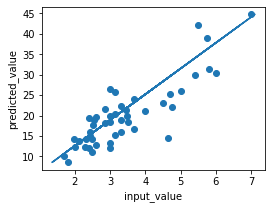

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def predict(X,weight):
    X = np.insert(X,0,1,axis=1)
    pred_y = np.dot(X,weight.T)
    return pred_y

predicted_value = predict(X,weight)
mean_error = mean_squared_error(Y, predicted_value)
print("mean squared error ",mean_error)
r2 = r2_score(actual_Y,predicted_value)
print('r2 score for perfect model is', r2)
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(Y,X[:,0])
ax.plot(predicted_value, X[:,0])

ax.set_xlabel('input_value')
ax.set_ylabel('predicted_value')
plt.show()

### In Q.1, We have implemented Batch Gradient Descent from scratch
- From the above plot, we can observe a linear regression line between input value and predicted value.
- r2 square matrix would be negative which reflects that our regression model performance is not good (indicated by the negative value)
- Mean squared error is **0.49814**

#### Q2  On the full batch gradient descent visualize the contours of J(W) for different values of the learning rate η.

In [34]:
def hypothesis(theta,X):
    return np.dot(X,theta)
    
def batch_gradient_descent(theta, X, Y, alpha, iterations):
    theta_list = []
    cost_list = []
    theta_list.append(theta)
    cost_list.append(compute_cost(X, Y,theta))
    for i in range(iterations):
        check_theta = theta.copy()
        for j in range(len(theta)):
            check=0
            for k in range(len(Y)):
                check+=(hypothesis(theta, X[k]) - Y[k])*X[k][j]
        
            check_theta[j] = check_theta[j] - alpha*(1/(len(Y)))*check
        theta = check_theta.copy()
        
        theta_list.append(theta)
        cost_list.append(compute_cost(X, Y,theta))
        if i>0:
            if cost_list[i-1]-cost_list[i] < 0.0001:
                break
        

    return theta, theta_list, cost_list

Total no of iterations: 1768


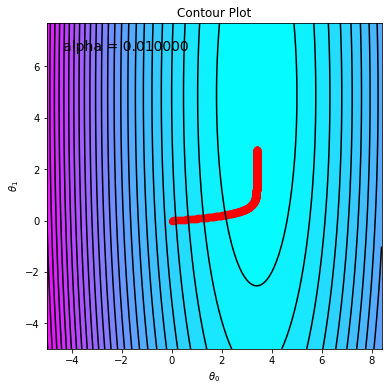

Total no of iterations: 698


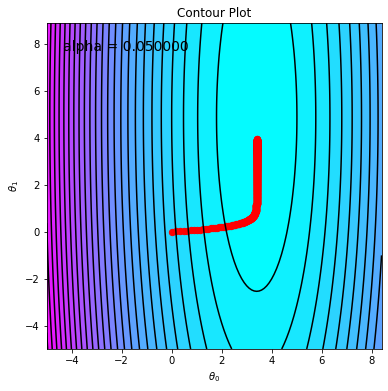

Total no of iterations: 2059


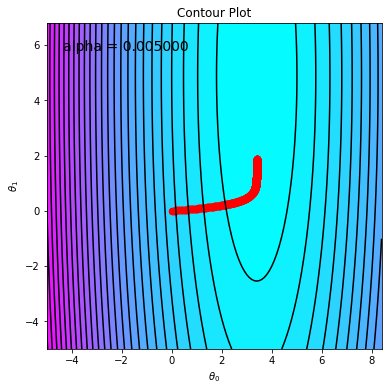

Total no of iterations: 2642


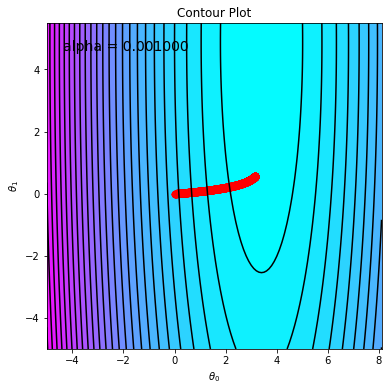

Total no of iterations: 10001


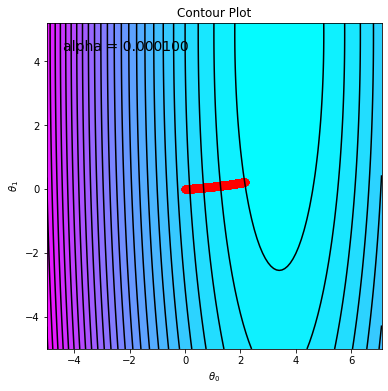

Total no of iterations: 4303


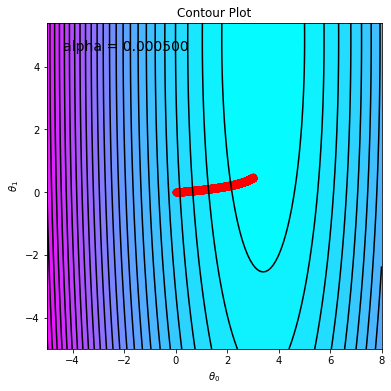

Total no of iterations: 7635


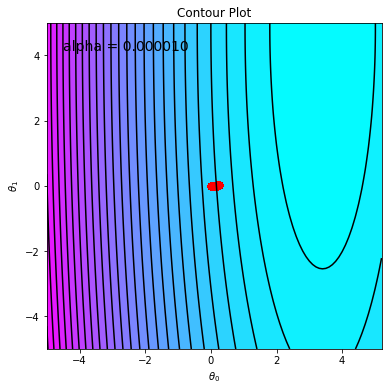

In [35]:
def contour_plot(learning_rate,X_train,Y_train):
    theta = np.zeros(2)
    theta, theta_list, cost_list = batch_gradient_descent(theta, X_train, Y_train, learning_rate, 10000)
    theta_list = np.array(theta_list)
    theta0_min, theta0_max = theta_list[:,0].min() - 5, theta_list[:,0].max() + 5
    theta1_min, theta1_max = theta_list[:,1].min() - 5, theta_list[:,1].max() + 5
    theta0_grid, theta1_grid = np.meshgrid(np.arange(theta0_min, theta0_max, 0.1), np.arange(theta1_min, theta1_max, 0.1))
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    W_Value = np.c_[theta0_grid.ravel(), theta1_grid.ravel()]
    Z=[]
    for i in range(len(W_Value)):
        Z.append(compute_cost( X_train, Y_train,W_Value[i]))

    Z = np.array(Z)
    Z = Z.reshape(theta0_grid.shape)
    itrs=len(cost_list)
    print("Total no of iterations:", itrs)
   
    ax.contourf(theta0_grid, theta1_grid, Z, cmap=plt.cm.cool,  levels =  30)
    ax.contour(theta0_grid, theta1_grid, Z, colors='k', levels  = 30)
    ax.text(0.05, 0.95, 'alpha = %f' % learning_rate, transform = ax.transAxes, fontsize=14, verticalalignment = 'top')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_title('Contour Plot')
   
    for i in range(len(theta_list)):
        ax.scatter(theta_list[i][0], theta_list[i][1], c='r', s=40)
        
    plt.show()

X_train = X
mean_of_X = np.mean(X_train)
max_value_twod_col = np.amax(X_train, axis = 0)
min_value_twod_col = np.amin(X_train, axis = 0)
X_train = (X_train- mean_of_X)/(max_value_twod_col[0] - min_value_twod_col[0])
X_train = np.insert(X_train,0,1,axis=1)
Y_train = Y
learning_rate_list= [0.01,0.05,0.005,0.001,0.0001,0.0005,0.00001]
for learning_rate in learning_rate_list:
    contour_plot(learning_rate,X_train,Y_train)


#### We can observe that in the case of batch gradient descent, contour values are cost values and at the given learning rate, weight values are try to reach the minimum cost value (The Convergence of the contours can be observed).
- When the learning rate value equals **0.00001**, weights do not converge.
- For learning rates from **0.01** to **0.005**, the weights converge.

### Q3 On the stochastic gradient descent visualize the contours of J(W) for different values of the learning rate and batch sizes η.

Total no of iterations: 274


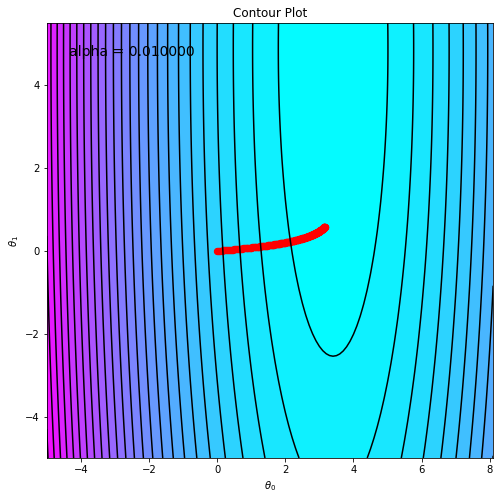

Total no of iterations: 209


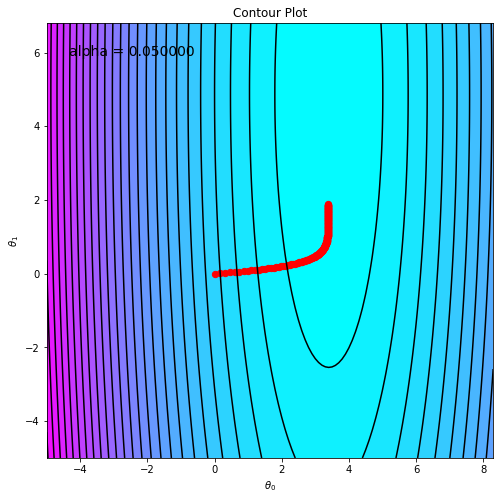

Total no of iterations: 443


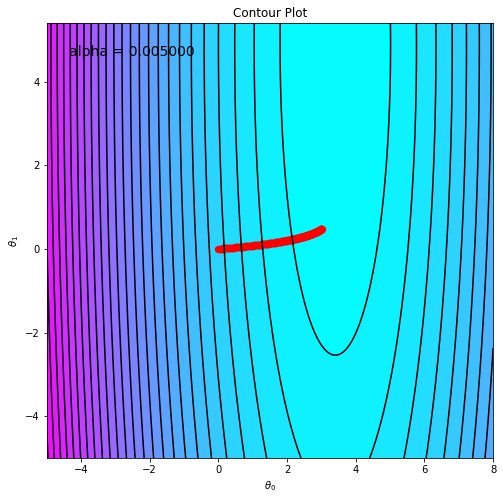

Total no of iterations: 1271


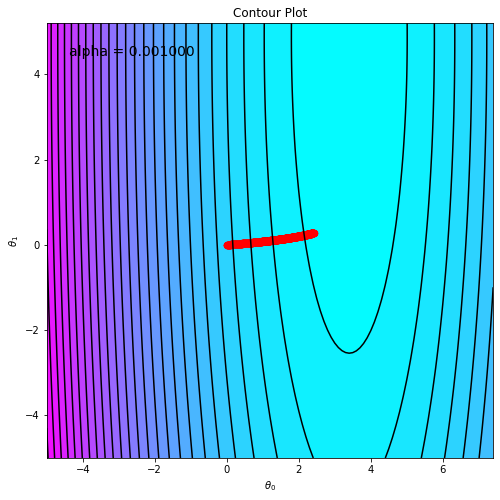

Total no of iterations: 654


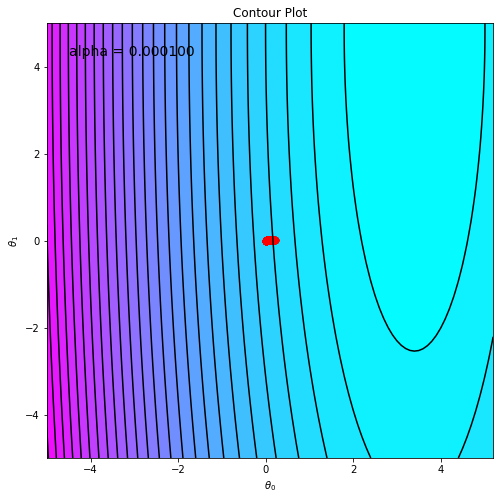

Total no of iterations: 1803


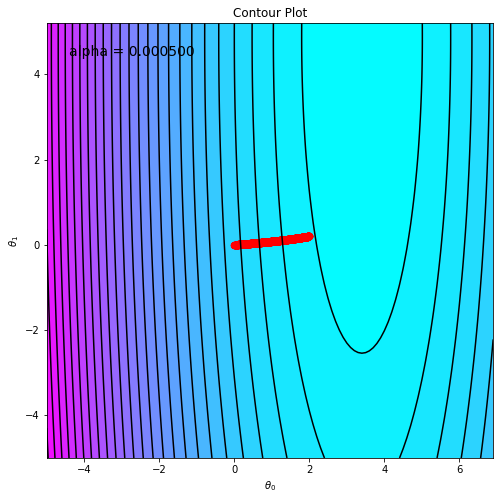

Total no of iterations: 3


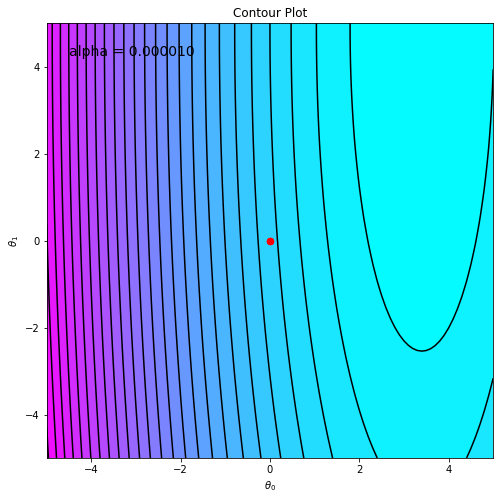

In [5]:
def hypothesis(theta,X):
    return np.dot(X,theta)

def stochastic_gradient_descent(theta, X, Y, alpha, iterations):
    theta_list = []
    cost_list = []
    loss_list = []
    theta_list.append(list(theta))
    cost_list.append(compute_cost(X, Y,theta))
    for u in range(iterations):
        for i in range(1,len(Y)):
            for j in range(len(theta)):
                theta[j] = theta[j] + alpha*(1/(len(Y)))*(Y[i]-hypothesis(theta,X[i]))*X[i][j]
        
        theta_list.append(list(theta))
        cost_list.append(compute_cost(X, Y,theta))
        if u>0:
            if cost_list[u-1]-cost_list[u] < 0.001:
                break
        
#     plt.plot(np.array(iteration_list),np.array(cost_list))
    return theta, theta_list, cost_list


def contour_plot2(learning_rate,X_train,y_train):
  
    theta = np.zeros(2)
    theta, theta_list, cost_list =stochastic_gradient_descent(theta, X_train, y_train, learning_rate, 10000)
    
    itrs=len(cost_list)
    print("Total no of iterations:", itrs)
    
    theta_list = np.array(theta_list)
    theta0_min, theta0_max = theta_list[:,0].min() - 5, theta_list[:,0].max() + 5
    theta1_min, theta1_max = theta_list[:,1].min() - 5, theta_list[:,1].max() + 5
    theta0_grid, theta1_grid = np.meshgrid(np.arange(theta0_min, theta0_max, 0.1), np.arange(theta1_min, theta1_max, 0.1))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    Wis = np.c_[theta0_grid.ravel(), theta1_grid.ravel()]
    Z=[]
    for i in range(len(Wis)):
        Z.append(compute_cost( X_train, y_train,Wis[i]))

    Z = np.array(Z)
    Z = Z.reshape(theta0_grid.shape)
   
    ax.contourf(theta0_grid, theta1_grid, Z, cmap=plt.cm.cool,  levels =  30)
    ax.contour(theta0_grid, theta1_grid, Z, colors='k', levels=30)
    
    ax.text(0.05, 0.95, 'alpha = %f' % learning_rate, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
    ax.set_title('Contour Plot')
    
    for i in range(len(theta_list)):
        ax.scatter(theta_list[i][0], theta_list[i][1], c='r', s=40)
        
    plt.show()
    
X_train = X
mean_of_X = np.mean(X_train)
max_value_twod_col = np.amax(X_train, axis = 0)
min_value_twod_col = np.amin(X_train, axis = 0)

X_train = (X_train- mean_of_X)/(max_value_twod_col[0] - min_value_twod_col[0])
X_train = np.insert(X_train,0,1,axis=1)

Y_train = Y

learning_rate_list= [0.01,0.05,0.005,0.001,0.0001,0.0005,0.00001]
for learning_rate in learning_rate_list:
    contour_plot2(learning_rate,X_train,Y_train)


#### We can observe that in the case of stochastic gradient descent, contour values are cost values and at the given learning rate, weight values are try to reach the minimum cost value (The Convergence of the contours can be observed).
- When the learning rate value equals **0.00001**, weights do not converge.
- For learning rates from **0.01** to **0.005**, the weights converge.

#### Q4 Implement locally weighted linear regression as described in Stanford lecturenotes.


In [38]:
def WM(point, X_train, tau): 
    L = X_train.shape[0] 
    W = np.mat(np.eye(L)) 
    for i in range(L): 
        x_i = X_train[i] 
        d = (-2 * tau * tau) 
        W[i, i] = np.exp(np.dot((x_i-point), (x_i-point).T)/d) 
        
    return W

In [39]:
def predictions(X_train, Y_train, point, tau): 
    M = X_train.shape[0] 
    X_train = np.append(X_train, np.ones(M).reshape(M,1), axis=1) 
    pointValues = np.array([point, 1]) 
    W = WM(pointValues, X_train, tau) 
    theta = np.linalg.pinv(X_train.T*(W * X_train))*(X_train.T*(W * Y_train)) 
    pred = np.dot(pointValues, theta) 
    
    return theta, pred

mean squared error  0.3374344927975528
r2 score for perfect model is 0.7794879797219018


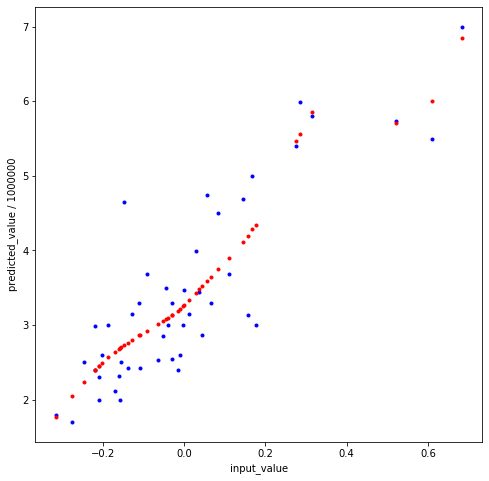

In [40]:
def plot_predictions(X, Y, tau, nval):
    X_test = X  
    preds = [] 
    Y = Y.reshape(X.shape[0],1)
    for i in range(len(X_test)): 
        theta, pred = predictions(X, Y, X_test[i][0], tau) 
        preds.append(pred)
        
    X_test = np.array(X_test).reshape(X.shape[0],1)
    preds = np.array(preds).reshape(X.shape[0],1)
    mean_error = mean_squared_error(Y, preds)
    print("mean squared error ",mean_error)
    r2 = r2_score(Y,preds)
    print('r2 score for perfect model is', r2)
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    ax.set_xlabel('input_value')
    ax.set_ylabel('predicted_value / 1000000')
    ax.plot(X, Y, 'b.')
    ax.plot(X_test, preds, 'r.')
    plt.show()

X_train = X
mean_of_X = np.mean(X_train)
max_value_twod_col = np.amax(X_train, axis = 0)
min_value_twod_col = np.amin(X_train, axis = 0)
X_train = (X_train- mean_of_X)/(max_value_twod_col[0] - min_value_twod_col[0])
Y_train = Y
plot_predictions(X_train,Y_train, 0.08, 100)

# it reflect that all data points are predicted correctly and all almost coincide to each other

## Importance of Locally Weighted Linear Regression Model
**Weighted linear regression should be used when the observation errors do not have a constant variance and violate homoscedasticity requirement of linear regression. The major downside of weighted linear regression is its dependency on the covariance matrix of the observation error.**
- We are getting an observable output from the above regression Model.
- The above plot shows how Predicted values(Dependent Varible) vary with Input value(Independent Variable).
- We are getting a positive r_2 score (**0.77948**) and it is close to 1 which shows that our model is working well.
- The weighted Regression Model also exhibits a very low mean squared error which implies our model has been successful in predicting well. 
